In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # 线性回归的类
from sklearn.preprocessing import StandardScaler # 数据标准化

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import time # 转置 逆 等矩阵运算的包

In [19]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [20]:
#加载数据
data = pd.read_csv('data/household_power_consumption_1000.txt',sep = ';',low_memory=False)
data.head(2)
# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣服用电功率、热水器用电功率

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0


In [21]:
#异常数据处理
#1.查找和替换异常值，将异常值替换为Nan
data1 = data.replace('?',np.nan)
data1.isnull()#缺失值
data1 = data1.dropna()# 默认剔除 包含缺失值的整行
data1.describe()
#从统计结果来看，原数据中没有异常值

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.418772,0.089232,240.03579,10.351000,0.0,2.749000,5.756000
std,1.239979,0.088088,4.08442,5.122214,0.0,8.104053,8.066941
min,0.206000,0.000000,230.98000,0.800000,0.0,0.000000,0.000000
25%,1.806000,0.000000,236.94000,8.400000,0.0,0.000000,0.000000
50%,2.414000,0.072000,240.65000,10.000000,0.0,0.000000,0.000000
75%,3.308000,0.126000,243.29500,14.000000,0.0,1.000000,17.000000
max,7.706000,0.528000,249.37000,33.200000,0.0,38.000000,19.000000


In [22]:
## 创建一个时间函数格式化字符串
def date_format(dt):
    # dt显示是一个series/tuple；dt[0]是date，dt[1]是time
    import time
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)   

In [23]:
dataTime = data.iloc[:,0:2]
type(dataTime)
dataTime.head()

,Date,Time
0,16/12/2006,17:24:00
1,16/12/2006,17:25:00
2,16/12/2006,17:26:00
3,16/12/2006,17:27:00
4,16/12/2006,17:28:00


In [24]:
#apply方法:将一个函数应用到行或者列上
X = dataTime.apply(lambda x: pd.Series(date_format(x)), axis=1)#????
X.head()

,0,1,2,3,4,5
0,2006,12,16,17,24,0
1,2006,12,16,17,25,0
2,2006,12,16,17,26,0
3,2006,12,16,17,27,0
4,2006,12,16,17,28,0


In [25]:
#数据分割
Y = data.iloc[:,2] # = data['Global_active_power']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)
print(len(X_train))
print(len(Y_train))

800
800


In [26]:
#查看训练集数据
print(type(X_train))
print(type(Y_train))
print(X_train.describe())
pd.DataFrame(Y_train).describe()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
            0      1           2           3           4      5
count   800.0  800.0  800.000000  800.000000  800.000000  800.0
mean   2006.0   12.0   16.598750   10.755000   29.723750    0.0
std       0.0    0.0    0.490458    8.068386   17.266517    0.0
min    2006.0   12.0   16.000000    0.000000    0.000000    0.0
25%    2006.0   12.0   16.000000    4.000000   15.000000    0.0
50%    2006.0   12.0   17.000000    8.000000   30.000000    0.0
75%    2006.0   12.0   17.000000   19.000000   45.000000    0.0
max    2006.0   12.0   17.000000   23.000000   59.000000    0.0


,Global_active_power
count,800.000000
mean,2.445438
std,1.237323
min,0.206000
25%,1.845500
50%,2.420000
75%,3.310500
max,7.706000


In [27]:
#from sklearn.preprocessing import StandardScaler # 数据标准化
#注意到  标准差 std行，现将其标准差转换为1的数据集
scaler = StandardScaler()# 创建标准化模型对象
X_train_trans = scaler.fit_transform(X_train)#先训练，再转换
X_test_trans = scaler.transform(X_test)#只转换
pd.DataFrame(X_train_trans).describe()
#X_test_trans

,0,1,2,3,4,5
count,800.0,800.0,8.000000e+02,8.000000e+02,8.000000e+02,800.0
mean,0.0,0.0,2.196299e-15,-8.604228e-17,3.691492e-17,0.0
std,0.0,0.0,1.000626e+00,1.000626e+00,1.000626e+00,0.0
min,0.0,0.0,-1.221561e+00,-1.333814e+00,-1.722545e+00,0.0
25%,0.0,0.0,-1.221561e+00,-8.377420e-01,-8.532677e-01,0.0
50%,0.0,0.0,8.186245e-01,-3.416698e-01,1.600918e-02,0.0
75%,0.0,0.0,8.186245e-01,1.022529e+00,8.852861e-01,0.0
max,0.0,0.0,8.186245e-01,1.518601e+00,1.696611e+00,0.0


In [28]:
#建立线性回归模型 训练 预测  准确率等
lr = LinearRegression(fit_intercept=True)
#class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)[source]
#fit_intercept: 是否要截距，也就是θ0θ0
#normalize：是否标准化
#copy_X：是否复制训练集，不改变原数据
#n_jobs：并行计算
lr.fit(X_train,Y_train)#模型训练

Y_predict = lr.predict(X_test)# 使用训练的模型进行预测


In [29]:
# 计算准确率
print("训练集的：",lr.score(X_train,Y_train))

print("测试集的：",lr.score(X_test,Y_test))

#计算MSE
MSE = np.average((Y_predict - Y_test)**2)
RMSE = np.sqrt(MSE)
print("rmse:",RMSE)
# 输出模型训练得到的相关参数
print("模型的系数(θ):", end="")
print(lr.coef_)
print("模型的截距:", end='')
print(lr.intercept_)

训练集的： 0.24409311805909073
测试集的： 0.1255162851373598
rmse: 1.164092345973624
模型的系数(θ):[ 0.00000000e+00 -1.72084569e-15 -2.88866162e+00 -1.15951092e-01
 -5.91923983e-03  0.00000000e+00]
模型的截距:51.81660553305287


In [30]:
#保存模型
from sklearn.externals import joblib
joblib.dump(scaler, "result/data_scaler.model") ## 将标准化模型保存
joblib.dump(lr, "result/data_lr.model") ## 将模型保存

['result/data_lr.model']

In [31]:
#加载模型
joblib.load("result/data_scaler.model")
joblib.load("result/data_lr.model")
#使用加载的模型进行预测
#时间
time1 = [[2006,12,17,15,6,0]]
print('标准化转换:')
print(scaler.transform(time1))
print('预测值:')
print(lr.predict(time1))

标准化转换:
[[ 0.          0.          0.81862454  0.52645669 -1.37483382  0.        ]]
预测值:
[0.93457621]


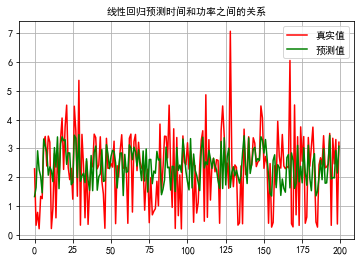

In [32]:
#画图
t=np.arange(len(X_test))


plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, Y_test, 'r-', linewidth=1.5, label='真实值')
plt.plot(t, Y_predict, 'g-', linewidth=1.5, label='预测值')
plt.legend(loc = 'upper right')#显示图例，设置图例的位置
plt.title("线性回归预测时间和功率之间的关系", fontsize=10)
plt.grid(b=True)#加网格
plt.show()


功率与电流关系

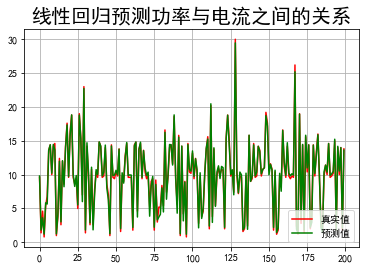

In [33]:
#1.数据切片
#data1.head()
X2 = data1.iloc[:,2:4]#功率
Y2 = data1.iloc[:,5]#电流

#数据分割
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size = 0.2,random_state = 0)
#print(len(X2_train))
#print(len(Y2_train))

#X2.describe()

#数据标准化
scaler2 = StandardScaler()
X2_train_trans = scaler2.fit_transform(X2_train)
Y2_train_trans = scaler2.transform(X2_test)
pd.DataFrame(X2_train_trans).describe()

#模型训练
#lr2 = LinearRegression(fit_intercept=True,)#模型对象建立
lr2.fit(X2_train,Y2_train)#模型训练
Y2_predict = lr2.predict(X2_test)#电流预测


#参数
#print("电流预测准确率: ", lr2.score(X2_test,Y2_test))
#print("模型的系数(θ):", end="")
#print(lr2.coef_)

#画图比较
t=np.arange(len(X2_test))
plt.figure(facecolor='w')
plt.plot(t, Y2_test, 'r-', linewidth=1.5, label=u'真实值')
plt.plot(t, Y2_predict, 'g-', linewidth=1.5, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测功率与电流之间的关系", fontsize=20)
plt.grid(b=True)
plt.show()